# Principal Component Analysis on Iris Dataset

<b>Dataset:</b><i> Iris Dataset</i> 
<br><a href="https://archive.ics.uci.edu/ml/datasets/iris">Description</a>

Attribute Information:

1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    * Iris Setosa 
    * Iris Versicolour 
    * Iris Virginica

## Import Libraries

### Standard Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


### Additional Libraries

In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load data from UCI Repository

In [3]:
#load data from online archive with URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

### Quickly inspect

In [4]:
df.head(5)


,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
target          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


## Visualizing the 4 dimensional dataset using PCA

### Normalize the dataset first

In [6]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Separating out the features
X = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values

In [7]:
# Standardizing the features
X_scaled = StandardScaler().fit_transform(X)

### PCA Projection into 2D

In [8]:
#Get the first 2 PCA components only
pca = PCA(n_components=2) #0.99 - 99% of fdata
principalComponents = pca.fit_transform(X_scaled)

In [9]:
#Output of PCA is a 2-dimensional array
principalComponents 

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [10]:
# Put array into a neat DataFrame
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC 1', 'PC 2'])  

In [13]:
principalDf.head()

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [11]:
#Add target column to the transformed DataFrame by using the Pandas concat() function 
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

In [12]:
finalDf.head()

,PC 1,PC 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


### Visualize 2D projection

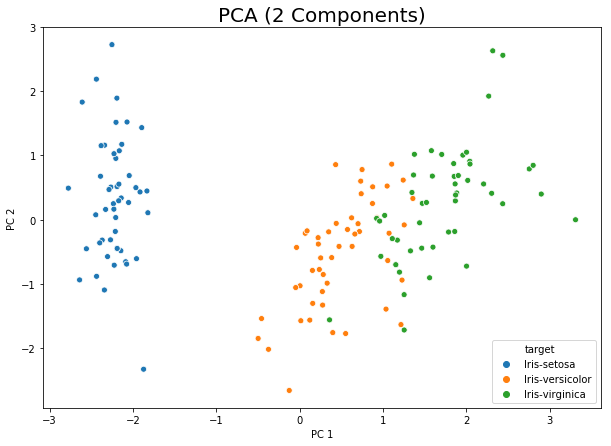

In [14]:
#Visualize the Clusters
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title('PCA (2 Components)', fontsize=20)
sns.scatterplot(ax = ax, x=finalDf['PC 1'], y=finalDf['PC 2'], hue=finalDf.target)

## Explained Variance
<p>The explained variance tells us how much information (variance) can be attributed to each of the principal components.</p>

In [15]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

To get the total variance explained by the PCA components, get the sum of the explained variance

In [16]:
pca.explained_variance_ratio_.sum() #the formula

0.9580097536148199

Given this value, it can be said that 95.8% of the variance of our data is explained by these 2 Principal Components